# Oscillating Chemical Reactions

A **chemical oscillator** is when the concentration of one or more components changes periodically in a complex mixture of reacting chemical compounds.

# Computational Model

In this simulation we will model the Chlorine Dioxide-Iodine Malonic Reaction to understand what would happen in a fixed versus non-fixed cycle. In order to understand what is happening we must first start off with writting the equations and then intergrating.

#### The following three reactions and empriical rate laws shows the behavior of the Chlorine Dioxide-Iodine Malonic Reaction:

* <font size="3">${MA}+{I_2}\rightarrow{IMA}+{I^{-}}+{H^{+}}$</font>; <font size="4"><mark >$\frac{d[I_2]}{dt}$</mark></font>= <font size="4">$-\frac{K_{1a}[MA][I_2]}{k_{1b}+[I_2]}$</font>



* <font size="3">${ClO_2}+{I^{-}}\rightarrow{ClO_2^{-}}$</font>+<font size="4">$\frac{1}{2}{I_2}$ </font>; <mark><font size="4">$\frac{d[ClO_2]}{dt}$</font></mark>= <font size="3">${-K_{2}}{[ClO_2]}{{[I^{-1}]}}$</font> 




* <font size="3">${ClO_2^{-}}+{4}{I^{-}}+{4}{H^{+}}\rightarrow{Cl^{-}}+{2}{I_2}+{2}{H_2{O}}$ ; <mark><font size="4">$\frac{d[ClO_2^{-}]}{dt}$</font></mark> = ${-k_{3a}}{[ClO_2^{-}]}{[I^{-}]}{[H^{+}}{-k_{3b}}{[ClO_2^{-}]}{[I^{2}]}$<font size="4">$\frac{[I^{-}]}{u+[I^{-}]^{2}}$</font> 
    
### Assumptions:
- Dimensionless
- Using constants to approximate the concentrations of the slow reactants
- Because the model ignores the slow consumption of the reactants, it cannot account for the eventual approach to equilibrium.
    
    
#### After simplifying the reaction it is reduced to a two-variable model:
*Where x and y are the dimensionless concentrations of $I^{-}$ and $ClO_{2}^{-}$. The parameters a,b > 0 depends on the empirical rate constants and on the concentration assumed for the slow reactants*
    
* <font size="3">$\dot{x} = {a}-{x}$</font><font size="4">$-\frac{{4}{x}{y}}{1+{x^{2}}}$</font>

    
* <font size="3">$\dot{y} = {b}{x}$</font><font size="4">$({1}-$</font><font size="4">$\frac{y}{1+{x^{2}}})$</font>
    

**Change the parameters a and b and determine if the chemical reaction reaches a fixed point or oscillates.**

*The boundary between the two regions is given by the Hopf bifurcation locus:*

<font size="4">$$b=\frac{3a}{5}-\frac{25}{a}$$</font>
    
* When b < $b_c$ all trajectories are attracted to s stable limit cycle
* when b > $b_c$ all trajectories spiral inot the stable fixed point


In [3]:
import ode
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

## Create Functions

In [5]:
def model(dep, t):

    x = dep[0]
    y = dep[1]
    
    deriv = np.zeros(2)
    deriv[0] = a-x-4*x*y/(1+x**2)
    deriv[1] = b*x*(1-y/(1+x**2))
    
    return deriv

def run(a,b):
    
    #dependent
    x = 0
    y = 0

    data = np.array([x,y])

    #independent
    t = 0
    h = 1/100
    Nsteps = int(100/h)

    xarray = np.zeros(Nsteps)
    yarray = np.zeros(Nsteps)
    tarray = np.zeros(Nsteps)

    xarray[0] = x
    yarray[0] = y
    tarray[0] = t


    for n in range(1,Nsteps):

        data = ode.RK4(model, data, t, h)

        t = t + h

        x = data[0]
        y = data[1]

        xarray[n] = x
        yarray[n] = y
        tarray[n] = t
    
    return xarray, yarray, tarray

def plotXY(t, x, y):
    plt.figure()
    plt.title("x and y vs. t")
    plt.xlabel("t")
    plt.plot(t,x,'b-', label='x')
    plt.plot(t,y,'r-', label='y')
    plt.legend()
    plt.show()


def plotXN(t, x, N):
    plt.figure()
    plt.title("x vs. t for last {:d} points".format(N))
    plt.xlabel("t")
    plt.plot(t[-N:],x[-N:],'b.', label='x')
    plt.ylim(np.min(x),np.max(x))
#    plt.plot(t,x,'b-', label='x')
    plt.legend()
    plt.show()

def isFixed(x, N):
        
    """Determine if the reaction produces a fixed point or an oscillation; return 1 for a fixed point
       and return 0 if not a fixed point.
    
    Keyword arguments:
    x -- array of x values
    N -- number of points to use at end of array
    
    Requires:
    numpy

    """ 
    ave = np.mean(x[-N:])
    stdev = np.std(x[-N:])
    tol = 1e-3
    relerr = stdev/ave
    if relerr < tol:
        return 1
    else:
        return 0

# Fixed Point

Refer back to the Hopf bifurcation locus to determine if it is a fixed point or a stable limit cycle:

<font size="4">$$b=\frac{3a}{5}-\frac{25}{a}$$</font>

When a = 10 is plugged into the equation $b_c$ = 3.5

**Since b > $b_c$ (4 > 3.5) the trajectory should spiral into a stable fixed point**

*Run the simulation below valaidate that the analtical solution was correct*

<IPython.core.display.Javascript object>


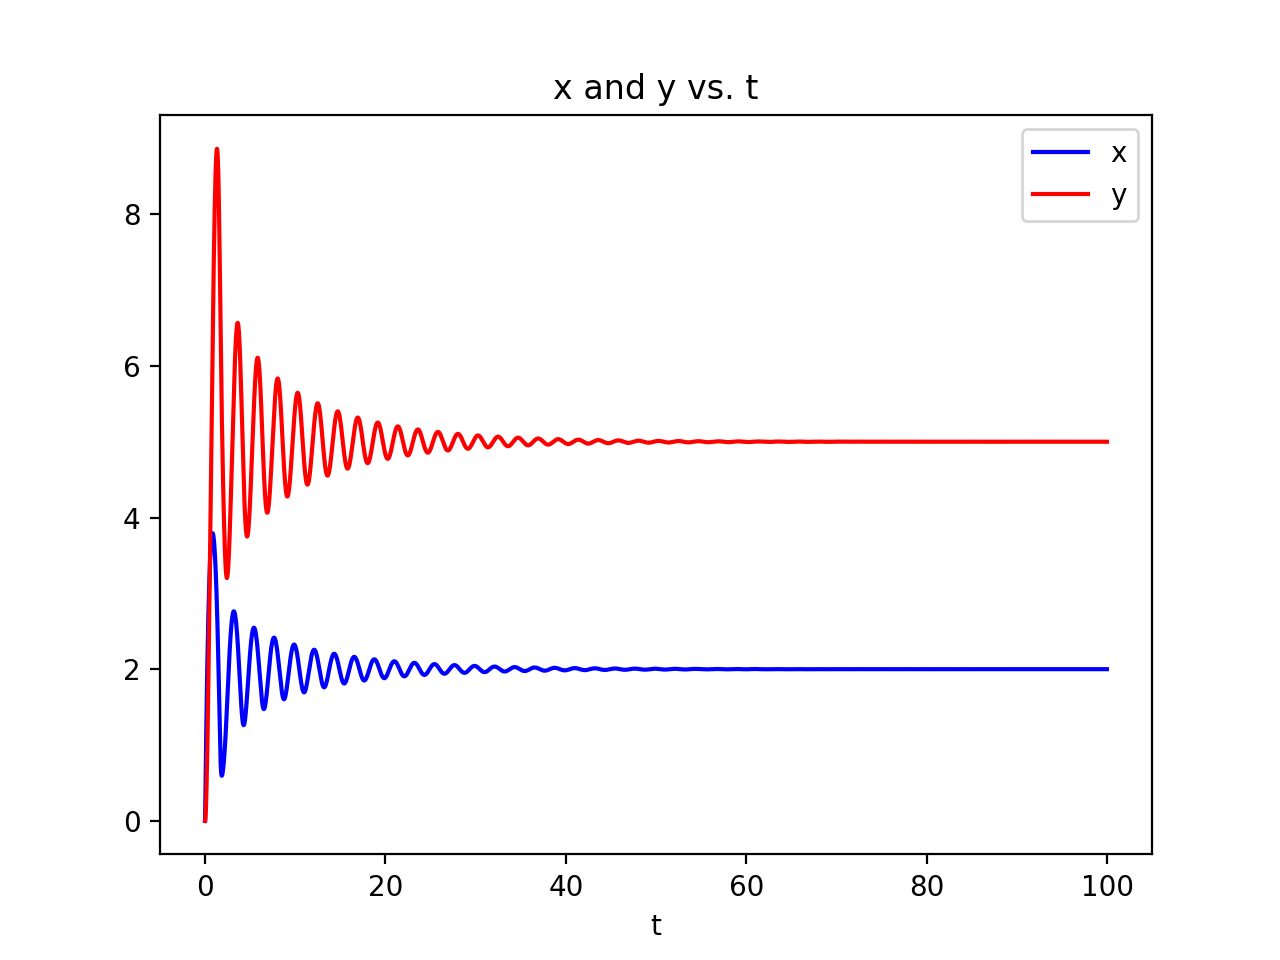

In [21]:
a = 10
b = 4
x,y,t = run(a,b)
plotXY(t,x,y)

Examine x for the last N points

<IPython.core.display.Javascript object>


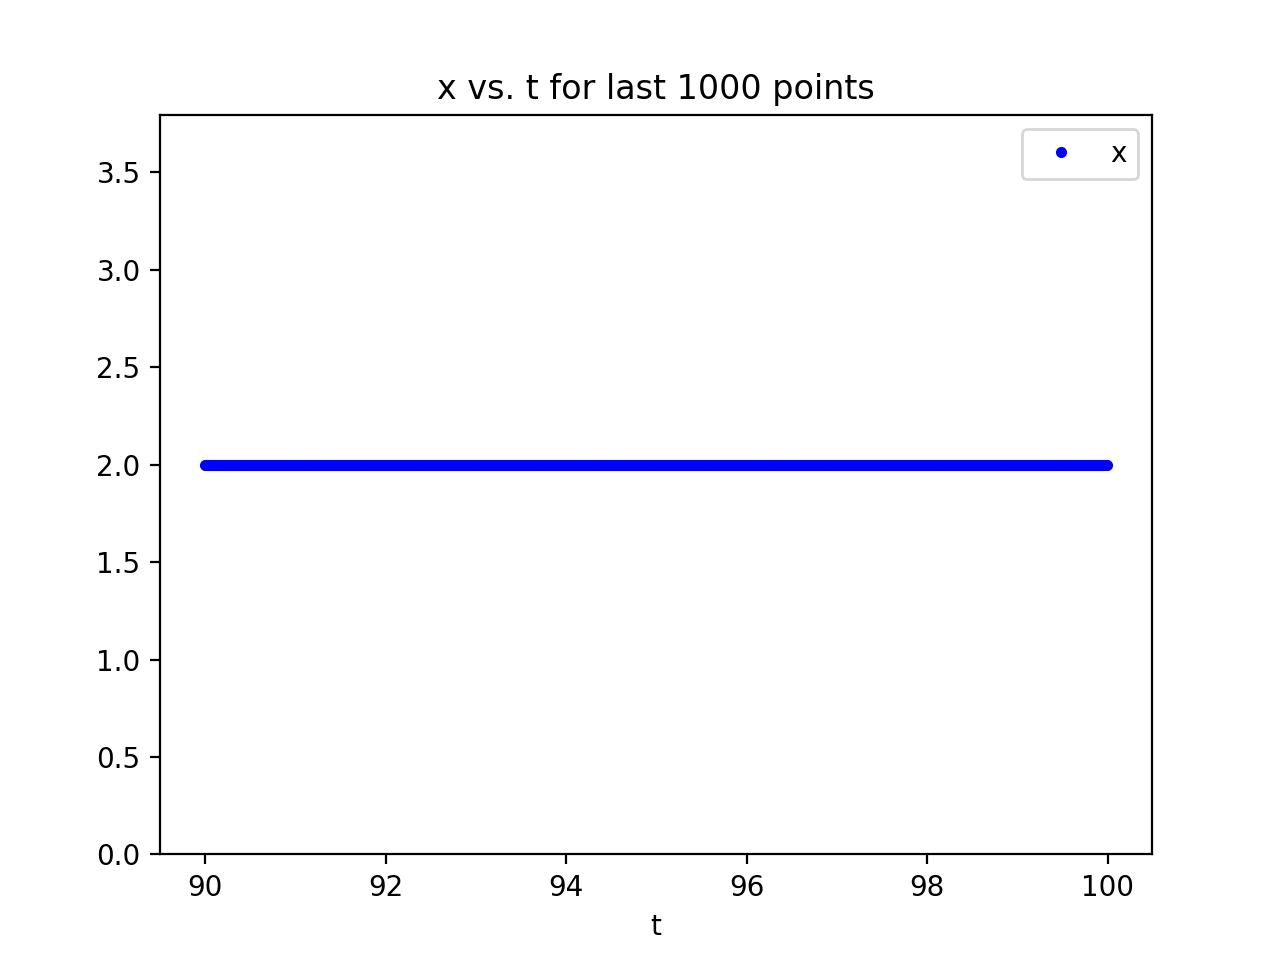

In [5]:
plotXN(t,x,1000)

Determine if it is a fixed point

In [1]:
result = isFixed(x,1000)
result

NameError: name 'isFixed' is not defined

# Stable Limit Cycle (Oscilation)

Refer back to the Hopf bifurcation locus to determine if it is a fixed point or an oscillation:

<font size="4">$$b=\frac{3a}{5}-\frac{25}{a}$$</font>

When a = 20 is plugged into the equation $b_c$ = 10.75

**Since b < $b_c$ (4 < 10.75) it is attracted to a stable limit cycle**

*Run the simulation below to valaidate that the analtical solution was correct*

<IPython.core.display.Javascript object>


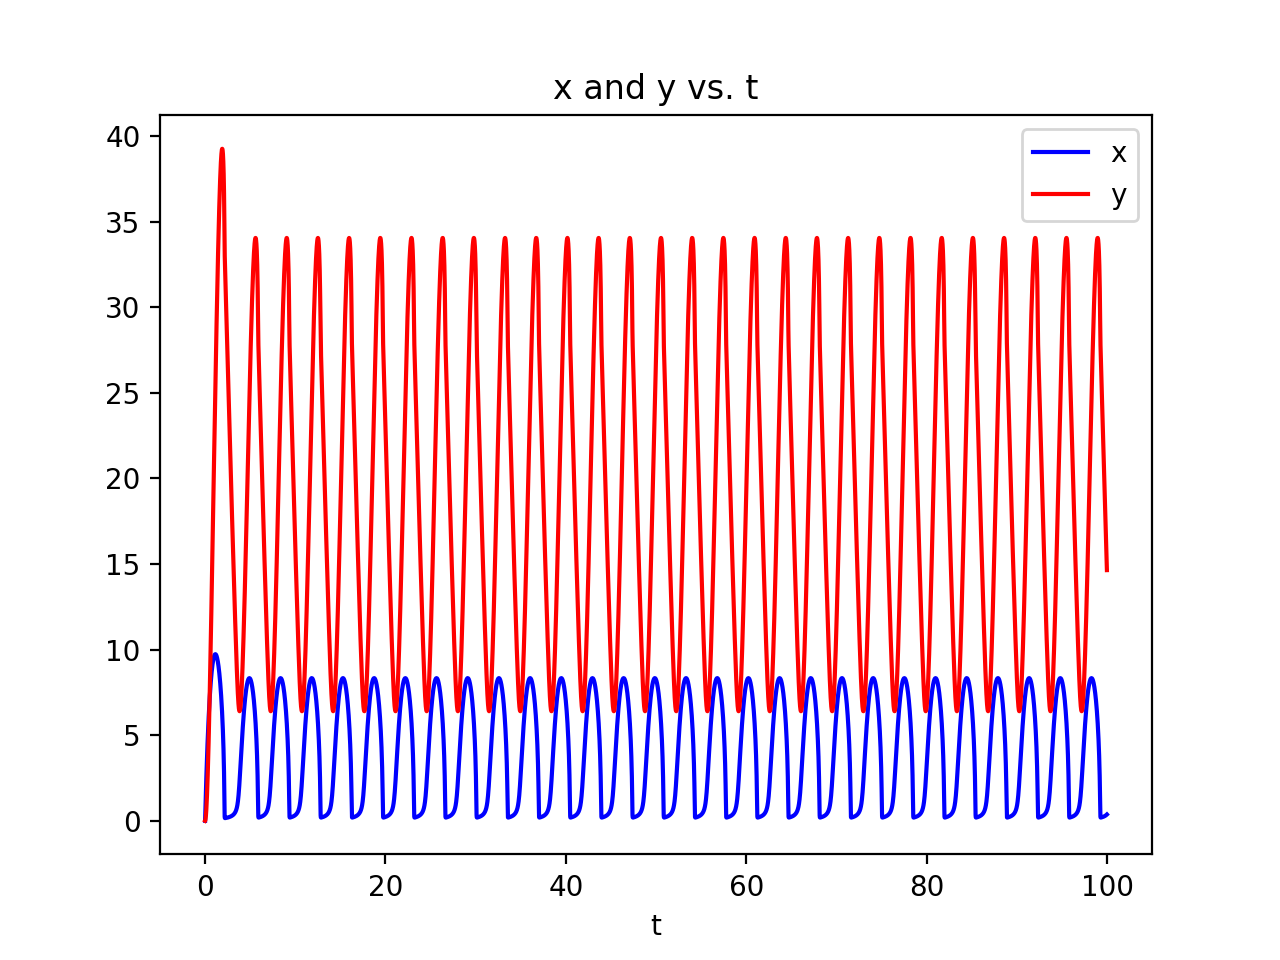

In [7]:
a = 20
b = 4
x,y,t = run(a,b)
plotXY(t,x,y)

<IPython.core.display.Javascript object>


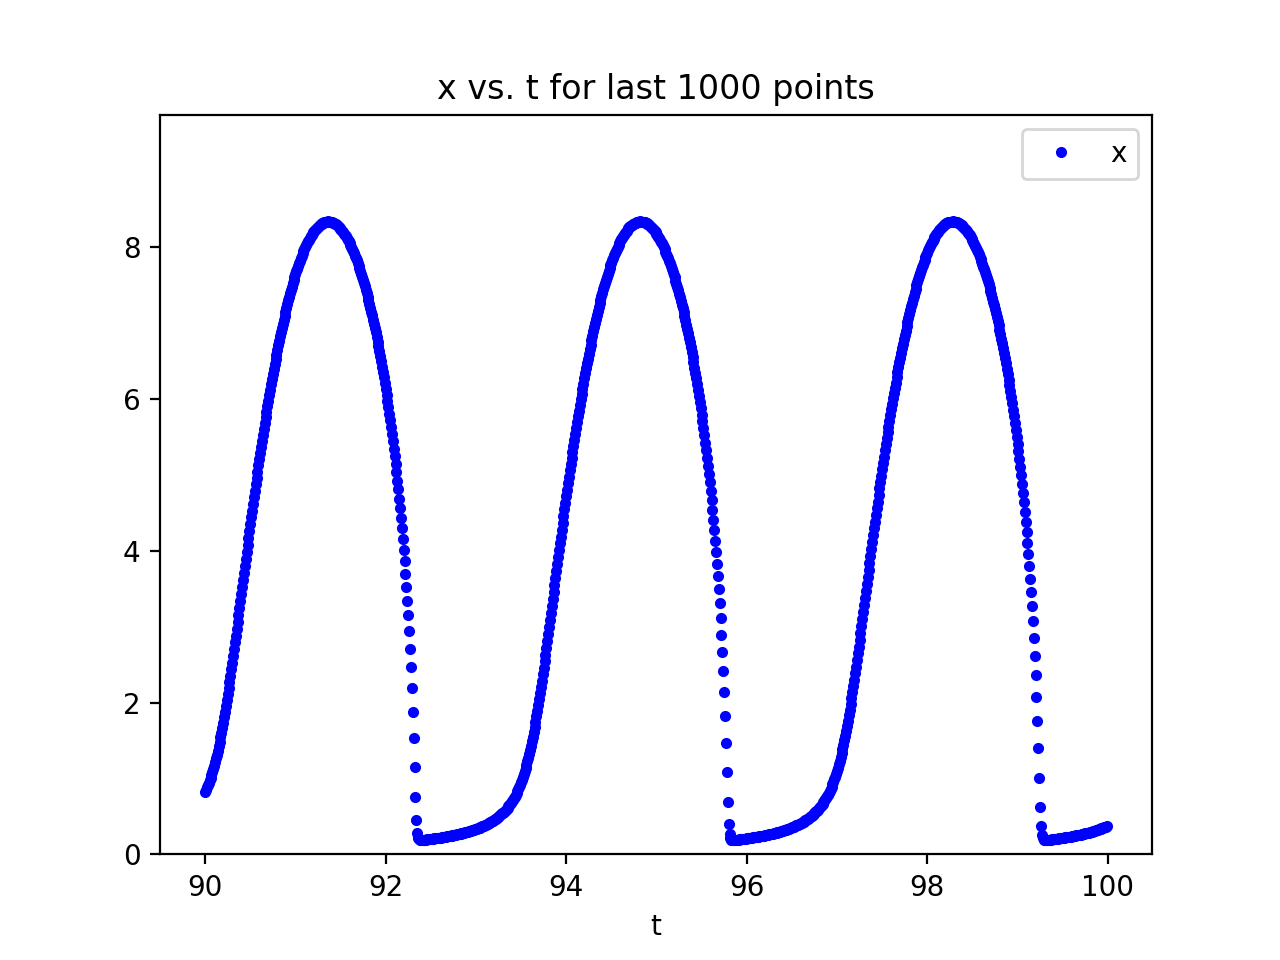

0

In [8]:
plotXN(t,x,1000)
result = isFixed(x,1000)
result

Yes, it works.

Write a loop to check for a fixed point or oscillation for varying a and b.

In [9]:
#max of both a and b
abmax = 40

#array of values of a and b
aarray = np.arange(1,abmax,2)
barray = np.arange(1,abmax,2)

#dictionary of values to store values of a,b that produce fixed points and oscillations
fixed = {
    "a": [],
    "b": []
}

osc = {
    "a": [],
    "b": []
}

#last N points of trajectory are used
N=1000

for a in aarray:
    for b in barray:
        # run sim
        x,y,t = run(a,b)
        
        # check for fixed or osc and store
        if isFixed(x,N):
            fixed['a'].append(a)
            fixed['b'].append(b)
        else:
            osc['a'].append(a)
            osc['b'].append(b)

Plot b vs. a

<IPython.core.display.Javascript object>


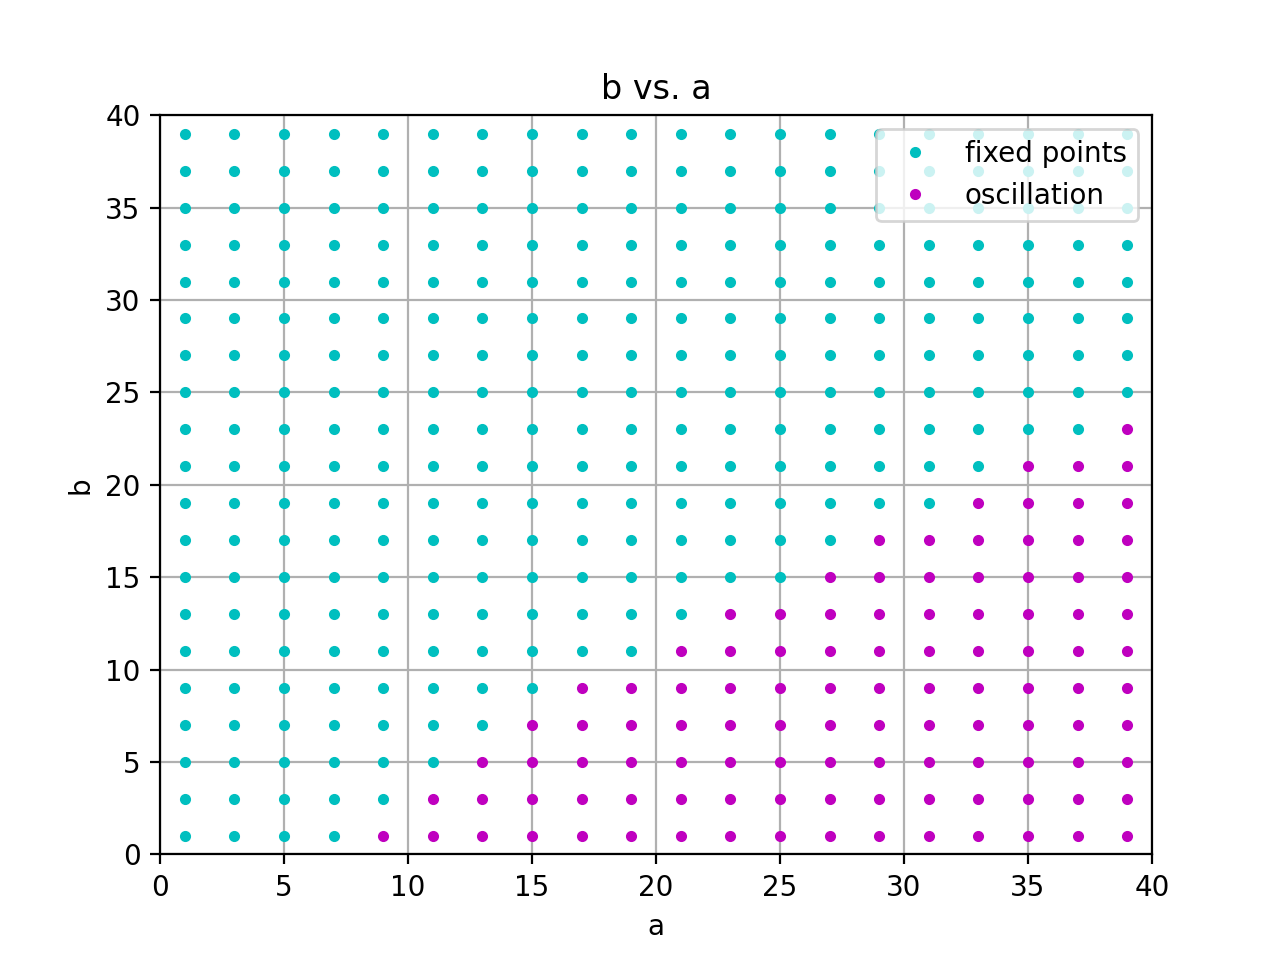

In [10]:
plt.figure()
plt.title("b vs. a")
plt.ylabel("b")
plt.xlabel("a")
plt.plot(fixed['a'],fixed['b'],'c.', label='fixed points')
plt.plot(osc['a'],osc['b'],'m.', label='oscillation')
plt.xlim(0,abmax)
plt.ylim(0,abmax)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Conclusion

The numerical results for the b vs. a graph are consistent with the hopf bifurcation locus analytical solution


## Referances

* Strogatz S 2019 Nonlinear Dynamics and Chaos: With applications to physics, biology, chemistry, and engineering (Boca Raton ; London ; New York: CRC Press, Taylor et Francis Group) 